# 1. Kết nối tới drive , import một số thư viện cần thiết

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

In [3]:
VIC = pd.read_csv("/content/drive/MyDrive/DAB Final Project/Source Code/Dataset/VIC.csv")

In [4]:
VIC

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,61653,61570,62314,60992,1.17M,0.13%
1,12/4/2017,62893,62066,63802,61570,2.08M,2.01%
2,12/5/2017,60331,63636,64876,58512,4.46M,-4.07%
3,12/6/2017,60331,60826,60826,57769,3.24M,0.00%
4,12/7/2017,59504,59917,60992,58678,1.22M,-1.37%
...,...,...,...,...,...,...,...
1371,6/5/2023,52100,52100,52500,52000,1.82M,0.19%
1372,6/6/2023,53200,52200,53200,52200,2.12M,2.11%
1373,6/7/2023,52800,53300,53600,52600,1.66M,-0.75%
1374,6/8/2023,52400,52800,53000,52400,1.44M,-0.76%


# 2. Tiền xử lý dữ liệu

### Loại bỏ một số dữ liệu trống trong dataset

In [5]:
# Drop missing values
VIC = VIC.dropna()
# Reset the index
VIC = VIC.reset_index(drop=True)

### Chuyển dữ liệu cột Price sang dạng float

In [6]:
VIC["Price"]=VIC["Price"].astype(float)

# 3. Trực quan hóa tập dữ liệu ban đầu bằng biểu đồ

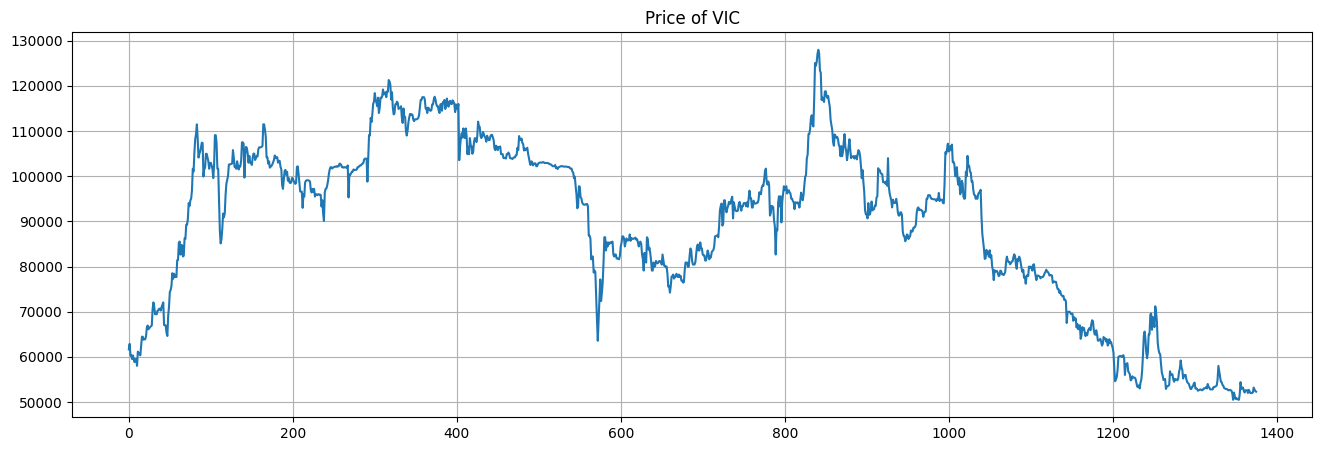

In [7]:
# Illustrated representation of Close Stock Price
plt.figure(figsize=(16,5))
plt.plot(VIC["Price"])
plt.title('Price of VIC')
plt.grid(True)
plt.show()

# 4. Chia tập dữ liệu để train-test-validate theo tỉ lệ 7:2:1

In [8]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(VIC))
test_size = int(0.2 * len(VIC))
val_size = len(VIC) - train_size - test_size

In [9]:
train_data = VIC[:train_size]
test_data = VIC[train_size:train_size+test_size]
val_data = VIC[train_size+test_size:]

<h1> Quá trình training

In [10]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [11]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [12]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [13]:
#Tạo index cho 30 ngày tiếp theo
last_index =  VIC.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[97869.55798102 97870.38102973 97871.20407843 97872.02712714
 97872.85017585 97873.67322456 97874.49627327 97875.31932197
 97876.14237068 97876.96541939 97877.7884681  97878.61151681
 97879.43456551 97880.25761422 97881.08066293 97881.90371164
 97882.72676035 97883.54980905 97884.37285776 97885.19590647
 97886.01895518 97886.84200389 97887.66505259 97888.4881013
 97889.31115001 97890.13419872 97890.95724743 97891.78029613
 97892.60334484 97893.42639355]


<h1>Đánh giá độ chính xác của thuật toán

In [14]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 42638.5307337883
Testing RMSE: 24021.554015373207


In [15]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 42383.370588563244
Testing MAE: 20138.559095620152


In [16]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 77.55108393767078
Testing MAPE: 29.774664647632292


<h1>Vẽ hình mô tả dự đoán

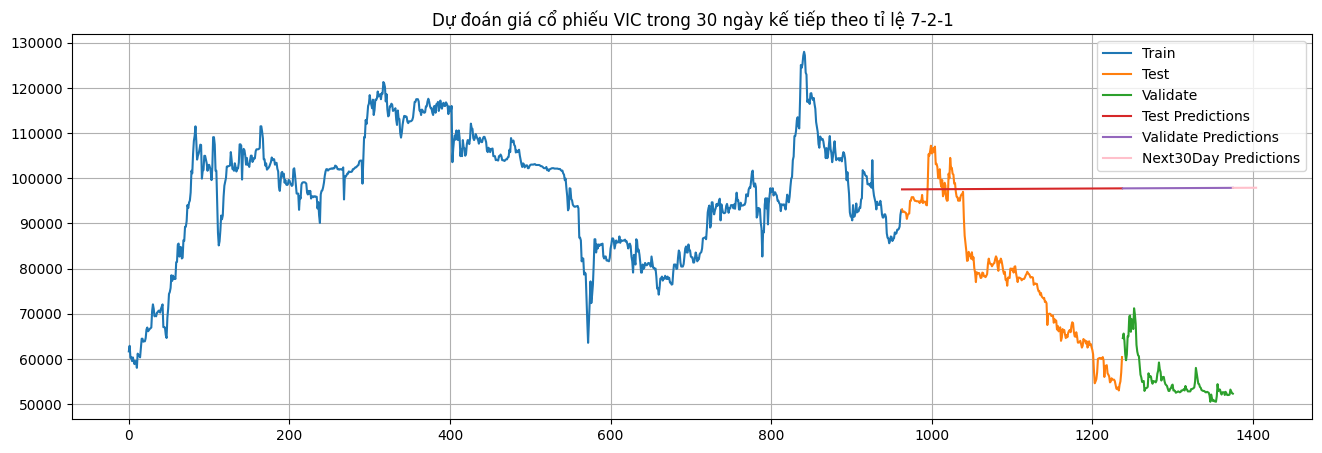

In [17]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu VIC trong 30 ngày kế tiếp theo tỉ lệ 7-2-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

# 5. Chia tập dữ liệu để train-test-validate theo tỉ lệ 6:3:1

In [18]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(VIC))
test_size = int(0.3 * len(VIC))
val_size = len(VIC) - train_size - test_size

In [19]:
train_data = VIC[:train_size]
test_data = VIC[train_size:train_size+test_size]
val_data = VIC[train_size+test_size:]

<h1>Quá trình training

In [20]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1>Quá trình testing

In [21]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [22]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [23]:
#Tạo index cho 30 ngày tiếp theo
last_index =  VIC.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[91857.00937533 91852.39165841 91847.77394149 91843.15622457
 91838.53850765 91833.92079073 91829.30307381 91824.6853569
 91820.06763998 91815.44992306 91810.83220614 91806.21448922
 91801.5967723  91796.97905538 91792.36133847 91787.74362155
 91783.12590463 91778.50818771 91773.89047079 91769.27275387
 91764.65503695 91760.03732004 91755.41960312 91750.8018862
 91746.18416928 91741.56645236 91736.94873544 91732.33101852
 91727.7133016  91723.09558469]


<h1>Đánh giá độ chính xác của thuật toán

In [24]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 36990.544521304706
Testing RMSE: 18183.89980485829


In [25]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 36715.50135818806
Testing MAE: 14649.262376035374


In [26]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 67.19990443158184
Testing MAPE: 19.728463097142935


<h1>Vẽ hình mô tả dự đoán

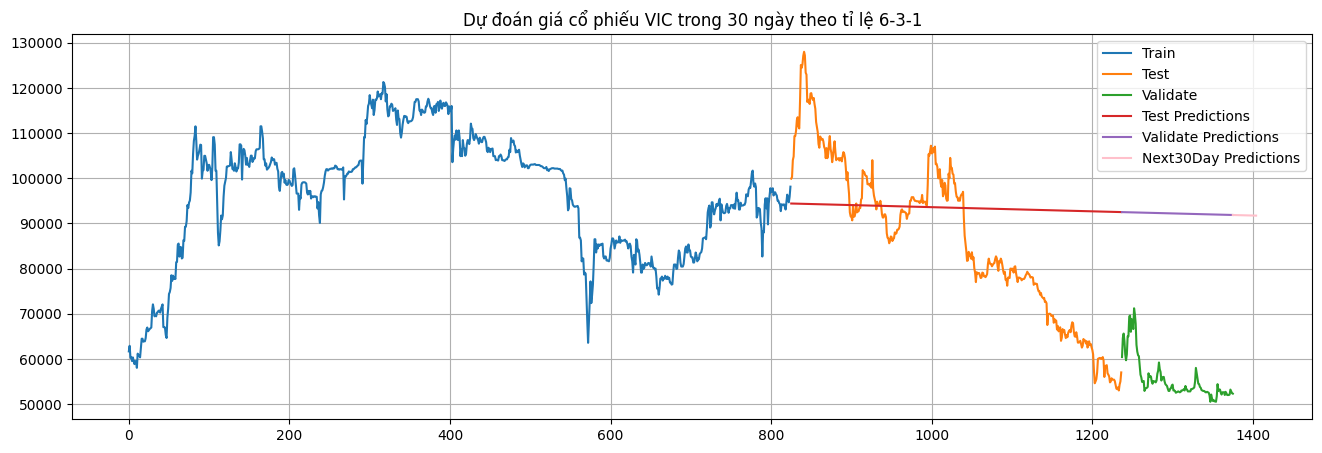

In [27]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title("Dự đoán giá cổ phiếu VIC trong 30 ngày theo tỉ lệ 6-3-1")
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color="pink")
plt.legend(['Train', 'Test','Validate', 'Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

# 6. Chia tập dữ liệu để train-test-validate theo tỉ lệ 5:3:2

In [28]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(VIC))
test_size = int(0.3 * len(VIC))
val_size = len(VIC) - train_size - test_size

In [29]:
train_data = VIC[:train_size]
test_data = VIC[train_size:train_size+test_size]
val_data = VIC[train_size+test_size:]

<h1> Quá trình training

In [30]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [31]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [32]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [33]:
#Tạo index cho 30 ngày tiếp theo
last_index =  VIC.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[98035.20808871 98035.99859094 98036.78909317 98037.5795954
 98038.37009764 98039.16059987 98039.9511021  98040.74160433
 98041.53210656 98042.32260879 98043.11311102 98043.90361325
 98044.69411549 98045.48461772 98046.27511995 98047.06562218
 98047.85612441 98048.64662664 98049.43712887 98050.2276311
 98051.01813334 98051.80863557 98052.5991378  98053.38964003
 98054.18014226 98054.97064449 98055.76114672 98056.55164896
 98057.34215119 98058.13265342]


<h1>Đánh giá độ chính xác của thuật toán

In [34]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 37774.89825038657
Testing RMSE: 10569.416295537898


In [35]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 36732.96990648542
Testing MAE: 8269.173472997925


In [36]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 63.10255539116052
Testing MAPE: 9.015735178084412


<h1>Vẽ hình mô tả dự đoán

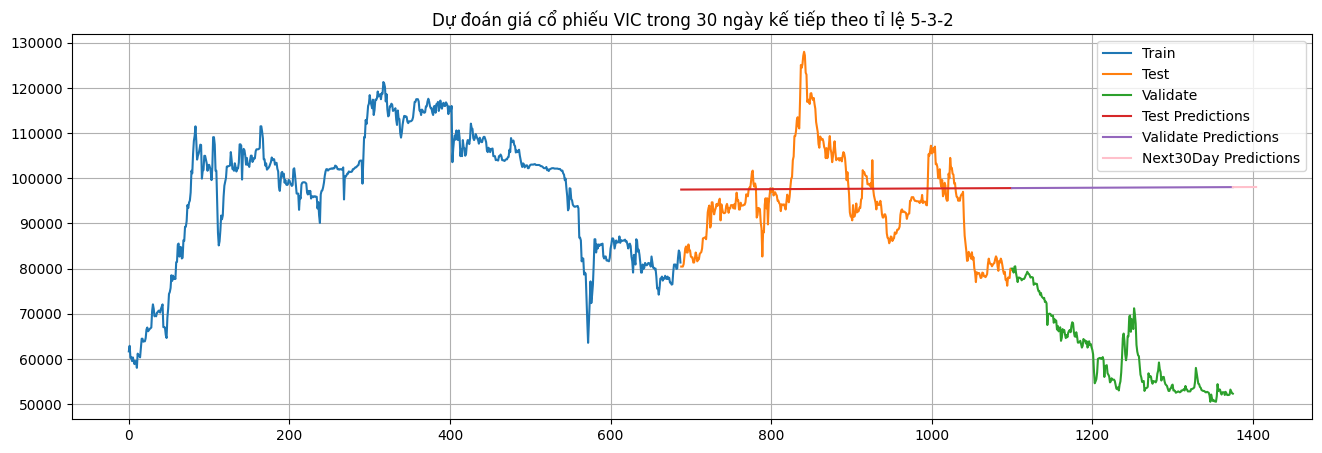

In [37]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu VIC trong 30 ngày kế tiếp theo tỉ lệ 5-3-2")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()